In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('models/{}.bin'.format(year)))
    for year in range(1720, 1960, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    return OrderedDict([
        (year, model.similarity(anchor, query))
        for year, model in models.items()
    ])

In [23]:
def plot_cosine_series(anchor, query):
    
    series = cosine_series(anchor, query)
    
    plt.ylim(0, 1)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))

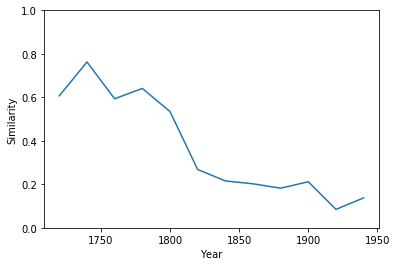

In [24]:
plot_cosine_series('literature', 'polite')